<a href="https://colab.research.google.com/github/AkiraTerao/AT/blob/master/diffraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy import signal
%matplotlib inline

Fraunhofer diffraction

In [65]:
def circ_fraun(x):
  I = (2*jv(1,k*x/(2*F))/(k*x/(2*F)))**2
  return I
def stair(x):
  if x < 0:
    return 1
  else:
    return 0
stairs = np.vectorize(stair)

In [50]:
F = 2 # z/D=F

#D = 1e-3 # Aperture size
A = 1
lam = 532e-9 # Wavelength
k = 2*np.pi/lam # Wave number

Reyleigh resolution:  1.298 um


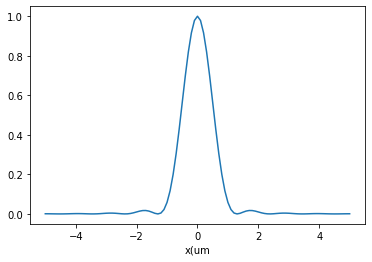

In [59]:
circ_fraun_I=np.vectorize(circ_fraun)
xmax = 5e-6
xmin = -xmax
dx = 1e-7
x = np.arange(xmin,xmax,dx)
frI = circ_fraun_I(x)
x1=1.22*lam*F
plt.plot(x*1e6,frI)
plt.xlabel('x(um')
print(f'Reyleigh resolution: {x1*1e6: 0.3f} um')

(-5.0, 5.0)

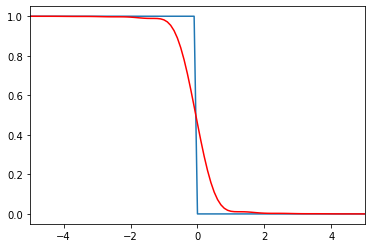

In [75]:
x2 = np.arange(-50e-6,50e-6,dx)
st = stairs(x2)
cv_st = np.convolve(st,frI,mode='same')
plt.plot(x2*1e6,st)
plt.plot(x2*1e6,cv_st/np.max(cv_st),'r')
plt.xlim([-5,5])

Contrast:  0.02


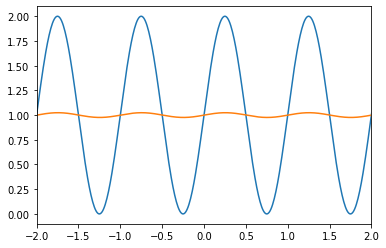

In [124]:
x3 = np.arange(-10e-3,10e-3,1e-5)
pat = np.sin(2*np.pi/1e-3*x3)+1
samp = 4.1e-3
num = int(samp/1e-5)
kernel = np.ones(num)/num
cov_pat = np.convolve(pat,kernel,mode='same')
plt.plot(x3*1e3,pat)
plt.plot(x3*1e3,cov_pat)
xr = 2e-3
plt.xlim([-xr*1e3,xr*1e3])

Imax = np.max(cov_pat[np.abs(x3)<xr])
Imin = np.min(cov_pat[np.abs(x3)<xr])
cnt = (Imax-Imin)/(Imax+Imin)
print(f'Contrast: {cnt: 0.2f}')

Contrast:  0.02


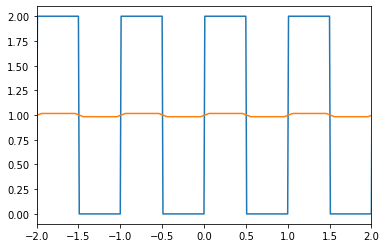

In [138]:
x3 = np.arange(-10e-3,10e-3,1e-5)
rec = signal.square(2*np.pi*x3/1e-3)+1
samp = 6.1e-3
num = int(samp/1e-5)
kernel = np.ones(num)/num
cov_rec = np.convolve(rec,kernel,mode='same')
plt.plot(x3*1e3,rec)
plt.plot(x3*1e3,cov_rec)
xr = 2e-3
plt.xlim([-xr*1e3,xr*1e3])

Imax = np.max(cov_rec[np.abs(x3)<xr])
Imin = np.min(cov_rec[np.abs(x3)<xr])
cnt = (Imax-Imin)/(Imax+Imin)
print(f'Contrast: {cnt: 0.2f}')